In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
#read data
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.shape

(13320, 9)

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
#Drop the column availibity(assume availability is not important for deciding final price)
df=df.drop("availability",axis=1)

In [10]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
len(df["total_sqft"])

13320

In [12]:
df.dtypes

area_type      object
location       object
size           object
society        object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [13]:
df.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

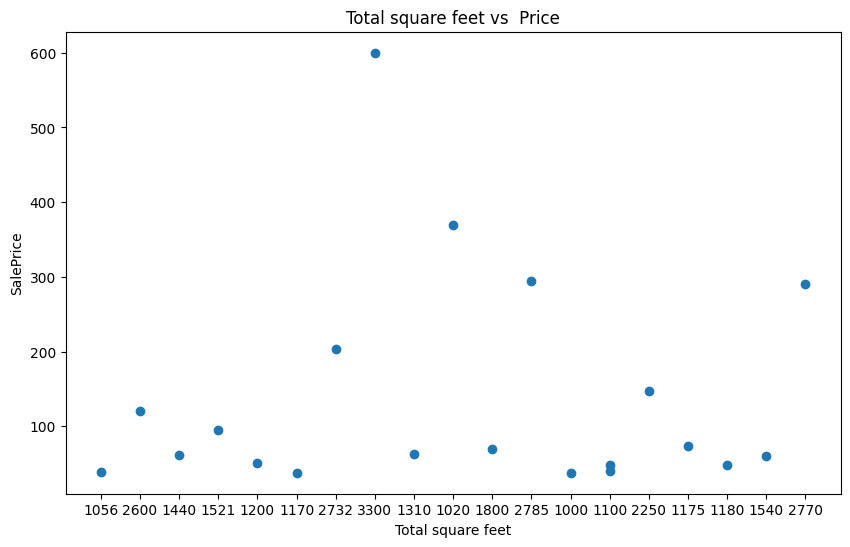

In [14]:
#plot total square feet vs Price
fig,ax=plt.subplots(figsize=(10,6))

ax.scatter(df["total_sqft"][:20],df["price"][:20]);
plt.xlabel("Total square feet")
plt.ylabel("SalePrice")
plt.title("Total square feet vs  Price");

<Axes: ylabel='Frequency'>

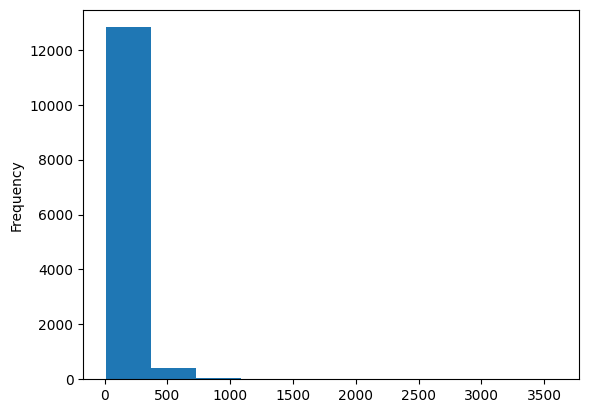

In [15]:
df.price.plot.hist()

In [16]:
#Calculating the number of null values
df.isnull().sum()

area_type        0
location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [17]:
#returns the count of all unique values in the given index in descending order without any null values
#by default normalize=False
df["total_sqft"].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [18]:
# returned will contain the relative frequencies of the unique values.
df["total_sqft"].value_counts(normalize=True)

total_sqft
1200    0.063288
1100    0.016592
1500    0.015390
2400    0.014715
600     0.013514
          ...   
3580    0.000075
2461    0.000075
1437    0.000075
2155    0.000075
4689    0.000075
Name: proportion, Length: 2117, dtype: float64

In [19]:
pd.value_counts(df["total_sqft"])


total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [20]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
#check the variation in total_sqft columns
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True;


In [22]:
df[~df["total_sqft"].apply(is_float)] #return range values of total_sqft

,area_type,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [23]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
df["size"]=df["size"].apply(str)
df["bhk"]=df["size"].apply(lambda x:float(x.split(" ")[0]))
df["bhk"]

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: bhk, Length: 13320, dtype: float64

In [25]:
df['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [26]:
df[df.bhk>20]     #error 43 bedroom with 2400 sqft

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27.0
4684,Plot Area,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43.0


In [27]:
df.total_sqft.unique()  #find datatype 1133-1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
len(df.location.unique())

1306

In [29]:
df.location.dtype

dtype('O')

In [30]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [31]:
#too many location are available here.This can cause high dimensionality problem
df["location"]=df["location"].apply(str)
df.location=df.location.apply(lambda x:x.strip())
location_stats=df.groupby("location")["location"].agg('count').sort_values(ascending=False)
location_stats.head(5)
#location_stats=df.groupby("location")["location"].agg(count)

location
Whitefield         541
Sarjapur  Road     399
Electronic City    304
Kanakpura Road     273
Thanisandra        237
Name: location, dtype: int64

In [32]:
location_less_than_10=location_stats[location_stats<=10]
len(location_less_than_10)

1054

In [33]:
len(df.location.unique())

1295

In [34]:
#named `other` if the location occur less than 10 time
df.location=df.location.apply(lambda x:'other' if x in location_less_than_10 else x)
len(df.location.unique())

242

In [35]:
def convert_sqft(x):
    x=str(x)
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    elif x.endswith("Sq. Meter"):
        x=x.removesuffix("Sq. Meter")
        return float(x)*10.7639
    elif x.endswith("Perch"):
        x=x.removesuffix("Perch")
        return float(x)*272.25
    elif x.endswith("Acres"):
        x=x.removesuffix("Acres")
        return float(x)*43560
    elif x.endswith("Sq. Yards"):
        x=x.removesuffix("Sq. Yards")
        return float(x)*9
    elif x.endswith("Cents"):
        x=x.removesuffix("Cents")
        return float(x)*435.56
    elif x.endswith("Guntha"):
        x=x.removesuffix("Guntha")
        return float(x)*1089
    elif x.endswith("Grounds"):
        x=x.removesuffix("Grounds")
        return float(x)*2400


#     else:
#         print(x)
    try:
        return x
    except:
        return None




In [36]:
df["total_sqft"]=df["total_sqft"].apply(convert_sqft)
df["total_sqft"].value_counts()
df.total_sqft.unique()
df.head(5)
#len(df["total_sqft"])

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [37]:
df.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
society                    LedorSa
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                            4.0
Name: 30, dtype: object

In [38]:
df.dtypes

area_type      object
location       object
size           object
society        object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

### Removing outliers

In [39]:
#assume minimum 200 sqft is required for a room
df["bhk"]=df["bhk"]
df["total_sqft"]=df["total_sqft"].astype(float)

df[df.total_sqft/df.bhk<200].head(20) #if any room less than 200 show that

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
9,Plot Area,other,6 Bedroom,NaN,1020.0,6.0,NaN,370.0,6.0
45,Plot Area,HSR Layout,8 Bedroom,NaN,600.0,9.0,NaN,200.0,8.0
68,Plot Area,Devarachikkanahalli,8 Bedroom,NaN,1350.0,7.0,0.0,85.0,8.0
70,Plot Area,other,3 Bedroom,NaN,500.0,3.0,2.0,100.0,3.0
89,Plot Area,Rajaji Nagar,6 Bedroom,NaN,710.0,6.0,3.0,160.0,6.0
119,Plot Area,Hennur Road,2 Bedroom,NaN,276.0,3.0,3.0,23.0,2.0
129,Plot Area,Vishwapriya Layout,7 Bedroom,NaN,950.0,7.0,0.0,115.0,7.0
149,Plot Area,other,6 Bedroom,NaN,1034.0,5.0,NaN,185.0,6.0
176,Plot Area,Kumaraswami Layout,5 Bedroom,NaN,600.0,3.0,2.0,85.0,5.0
349,Plot Area,other,3 Bedroom,PrhyaK,11.0,3.0,2.0,74.0,3.0


In [40]:
df.shape

(13320, 9)

In [41]:
df=df[~(df.total_sqft/df.bhk<200)]
df.shape

(12978, 9)

In [42]:
df.isnull().sum()

area_type        0
location         0
size             0
society       5167
total_sqft       0
bath            73
balcony        551
price            0
bhk             16
dtype: int64

In [43]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0


In [44]:
df["price_per_square_feet"]=df["price"]*100000/df["total_sqft"]
df

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_square_feet
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,other,4 BHK,NaN,3600.0,5.0,NaN,400.00,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [45]:
df["price_per_square_feet"].describe()

count     12978.000000
mean       6481.888638
std        4339.411341
min           2.257423
25%        4236.754298
50%        5350.248615
75%        7090.909091
max      176470.588235
Name: price_per_square_feet, dtype: float64

In [46]:
#remove price per square feet outliers

def remove_pps_outliers(df):

    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_square_feet)
        st=np.std(subdf.price_per_square_feet)
        reduced_df=subdf[(subdf.price_per_square_feet>(m-st)) & (subdf.price_per_square_feet<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)

       # print(subdf)
    return df_out




df=remove_pps_outliers(df)
df.shape

(10740, 10)

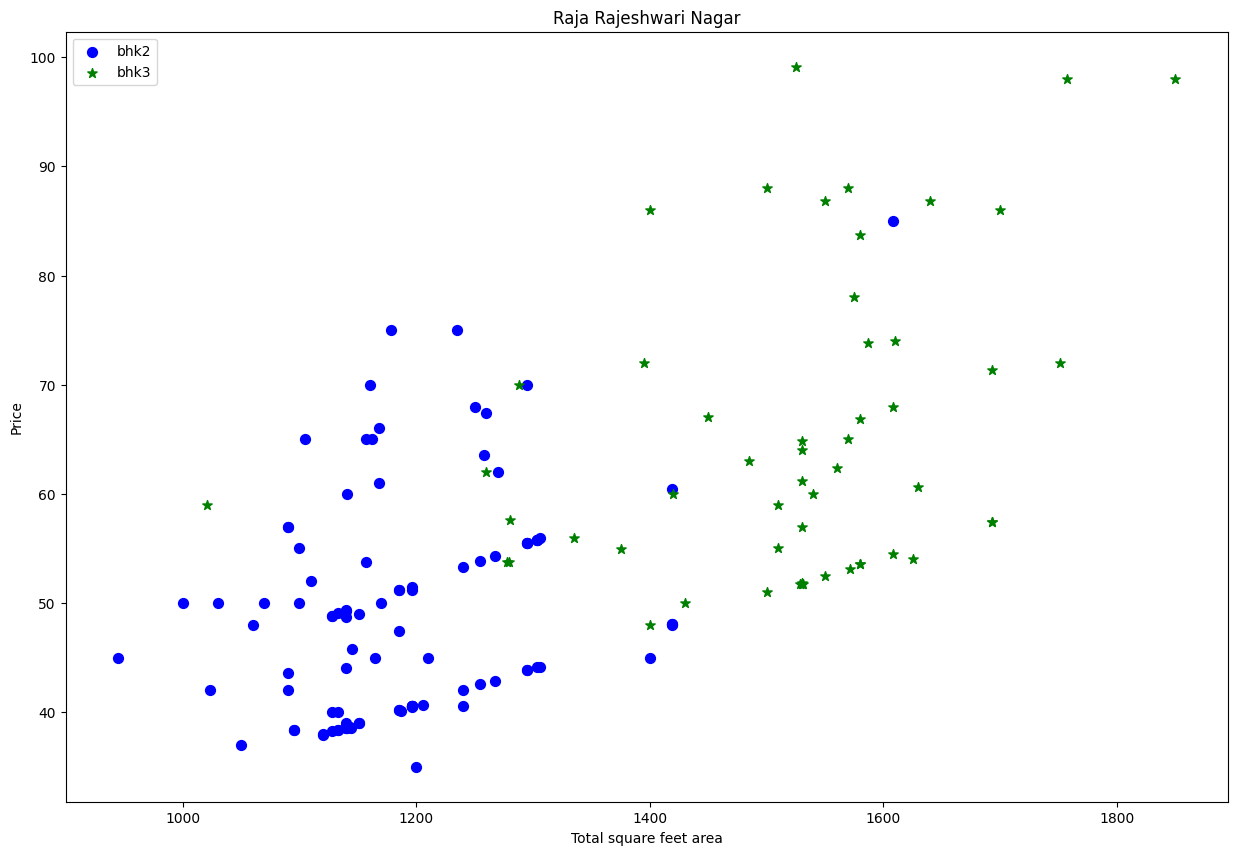

In [47]:
#scatter diagram 2bhk vs 3bhk(same location)
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',s=50,label="bhk2")
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',s=50,label='bhk3',marker='*')
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df,"Raja Rajeshwari Nagar")

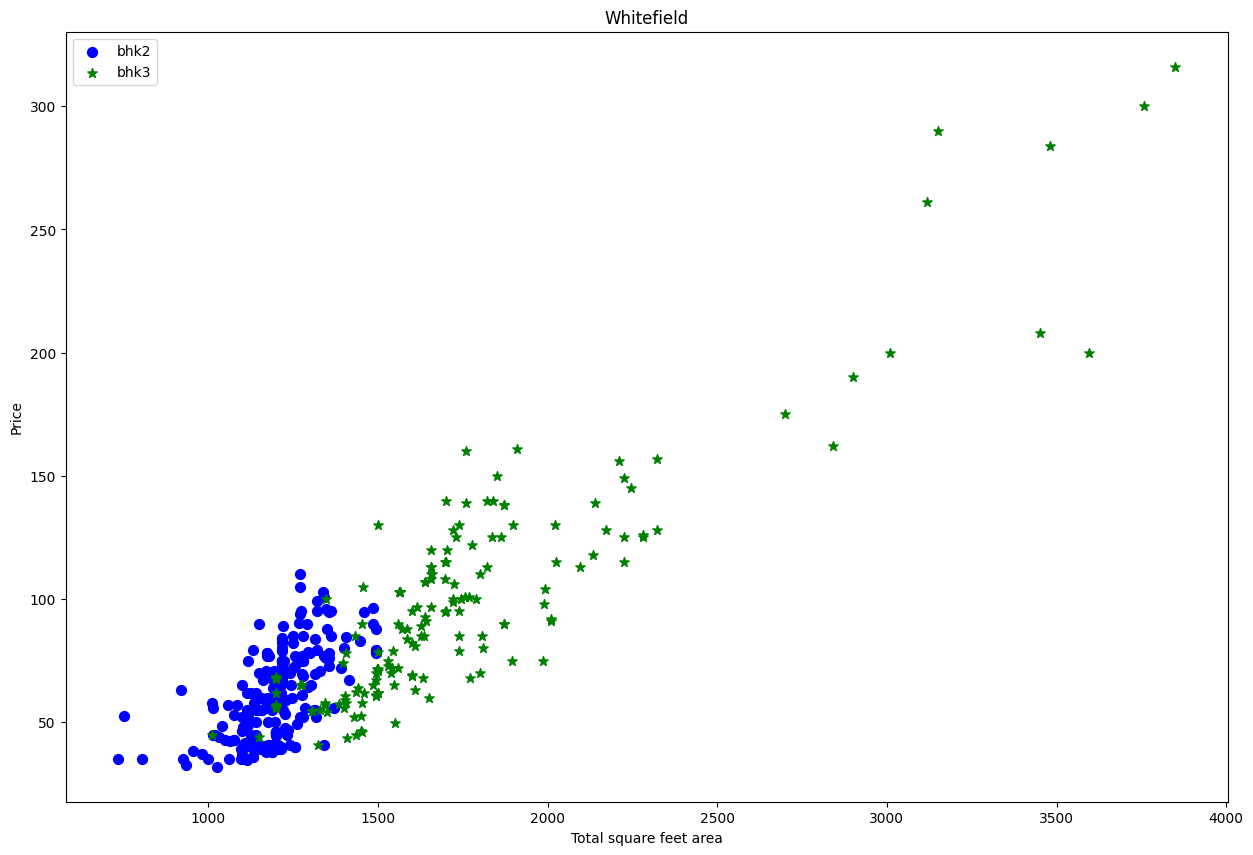

In [48]:
plot_scatter_chart(df,"Whitefield")

In [49]:
df.shape

(10740, 10)

In [50]:
# def remove_bhk_outliers(df):
#     exclude_indices=np.array([])
#     for location,location_df in df.groupby('location'):
#         bhk_stats={}
#         for bhk,bhk_df in df.groupby('bhk'):
#                 bhk_stats[bhk]={
#                 'mean':np.mean(bhk_df.price_per_square_feet),
#                 'std':np.std(bhk_df.price_per_square_feet),
#                 'count':bhk_df.shape[0]

#             }
#         for bhk,bhk_df in df.groupby('bhk'):
#             stats=bhk_stats.get(bhk-1)
#             #print(len(bhk_df))
#             if stats and stats['count']>5:
#             #print(stats['count'])
#                 exclude_indices=np.append(exclude_indices,bhk_df[(bhk_df.price_per_square_feet)<(stats['mean'])].index.values)
#         return df.drop(exclude_indices,axis="index")        #remove those values which 2 bedroom price_per_sqft is less than 1 bedroom price per sqft




# df= remove_bhk_outliers(df)
# df.shape


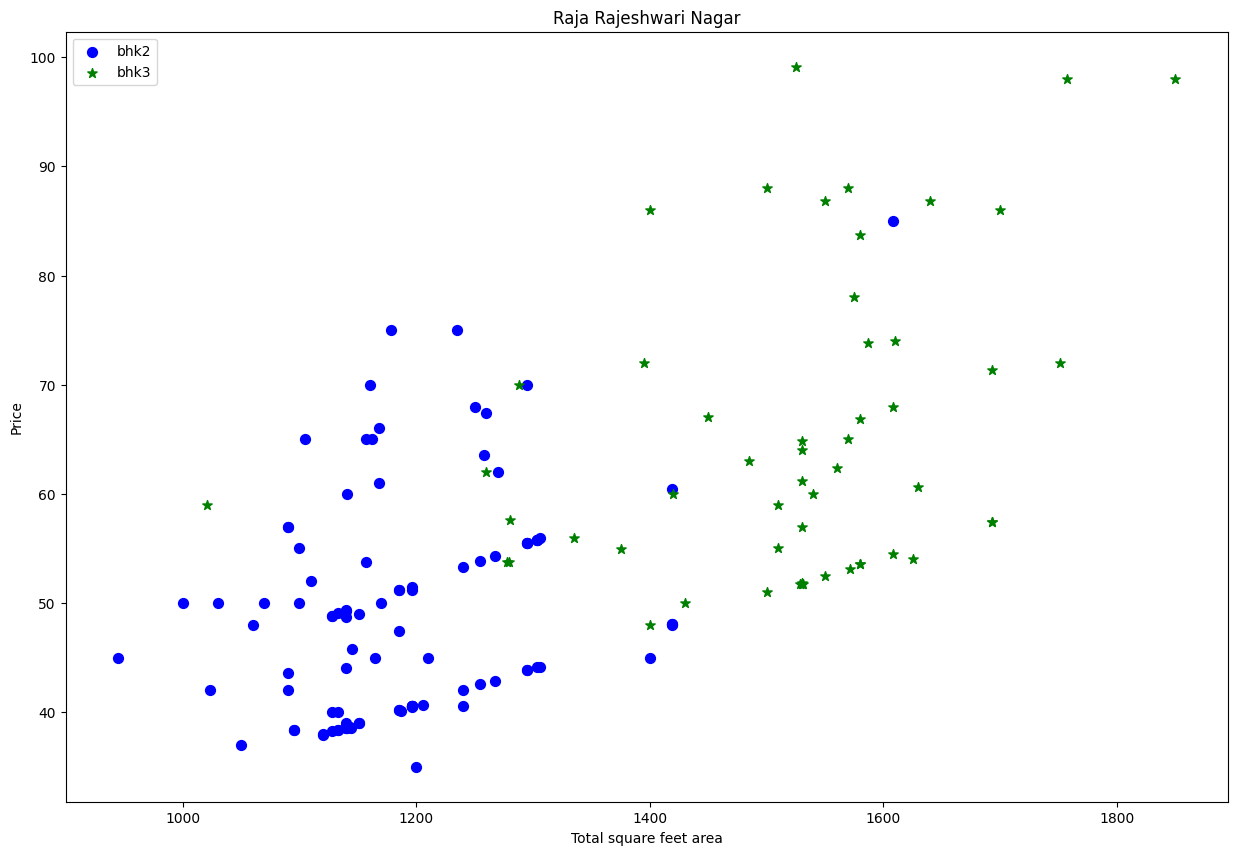

In [51]:
plot_scatter_chart(df,"Raja Rajeshwari Nagar")

Text(0, 0.5, 'count')

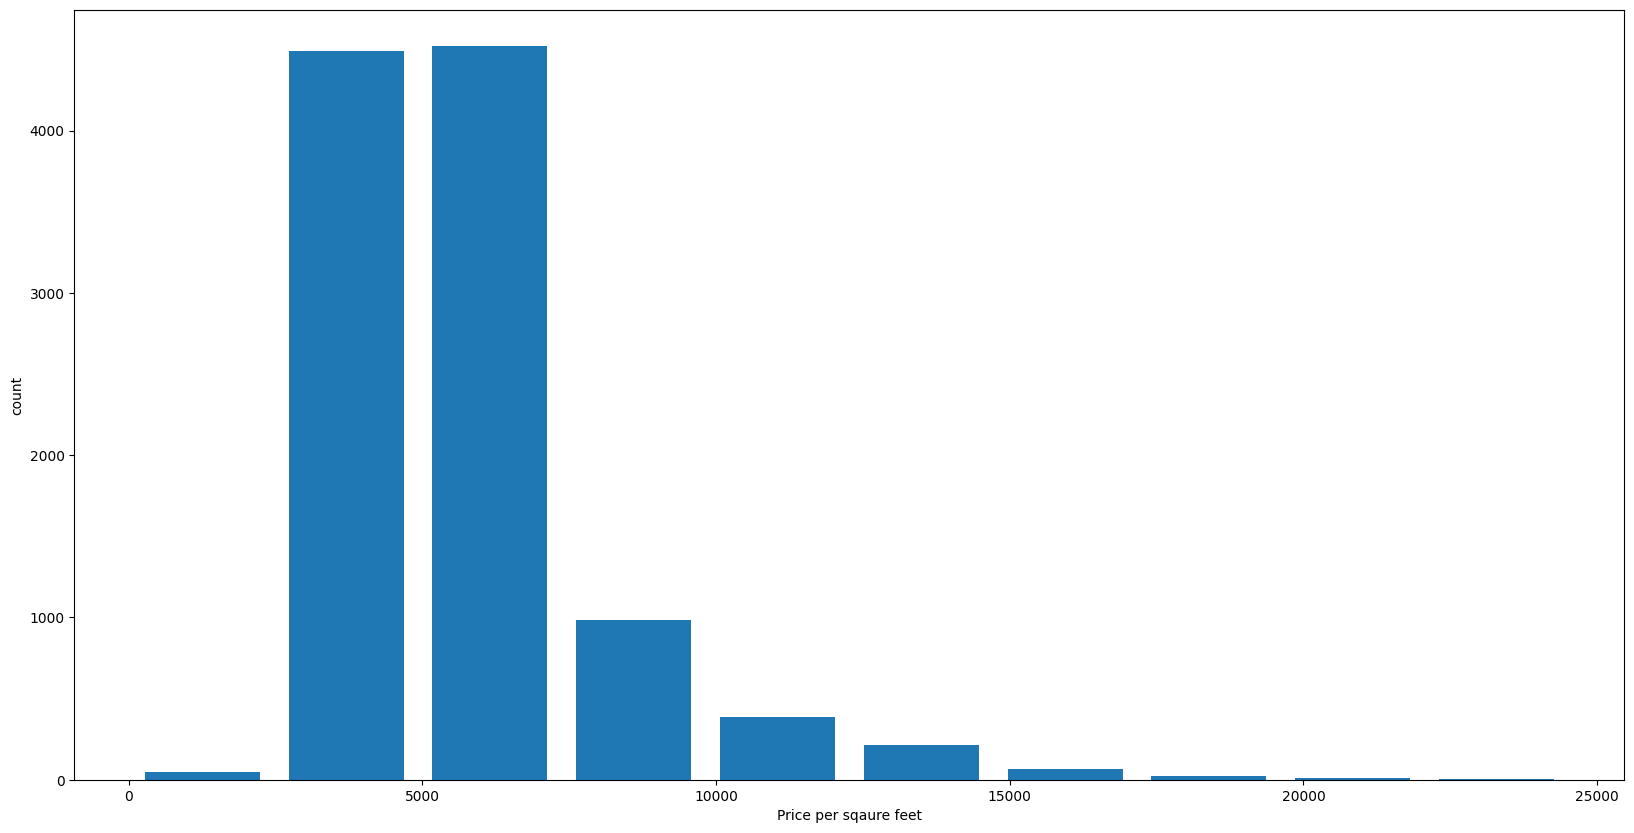

In [52]:
#draw histogram to see how many apartment in price per sqft
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df.price_per_square_feet,rwidth=.8)
plt.xlabel("Price per sqaure feet")
plt.ylabel("count")



In [53]:
df.bath.unique()   #bathroom occurs more than 10 times,this is anomalies or outliers

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7., nan,  9., 12., 10., 27.,
       16., 13.])

In [54]:
df[df["bath"]>10]

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_square_feet
5533,Super built-up Area,Neeladri Nagar,10 BHK,NaN,4000.0,12.0,NaN,160.0,10.0,4000.000000
8638,Super built-up Area,other,27 BHK,NaN,8000.0,27.0,0.0,230.0,27.0,2875.000000
8887,Super built-up Area,other,10 BHK,NaN,12000.0,12.0,NaN,525.0,10.0,4375.000000
8978,Super built-up Area,other,16 BHK,NaN,10000.0,16.0,NaN,550.0,16.0,5500.000000
9758,Super built-up Area,other,11 BHK,NaN,6000.0,12.0,NaN,150.0,11.0,2500.000000
10099,Super built-up Area,other,13 BHK,NaN,5425.0,13.0,0.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

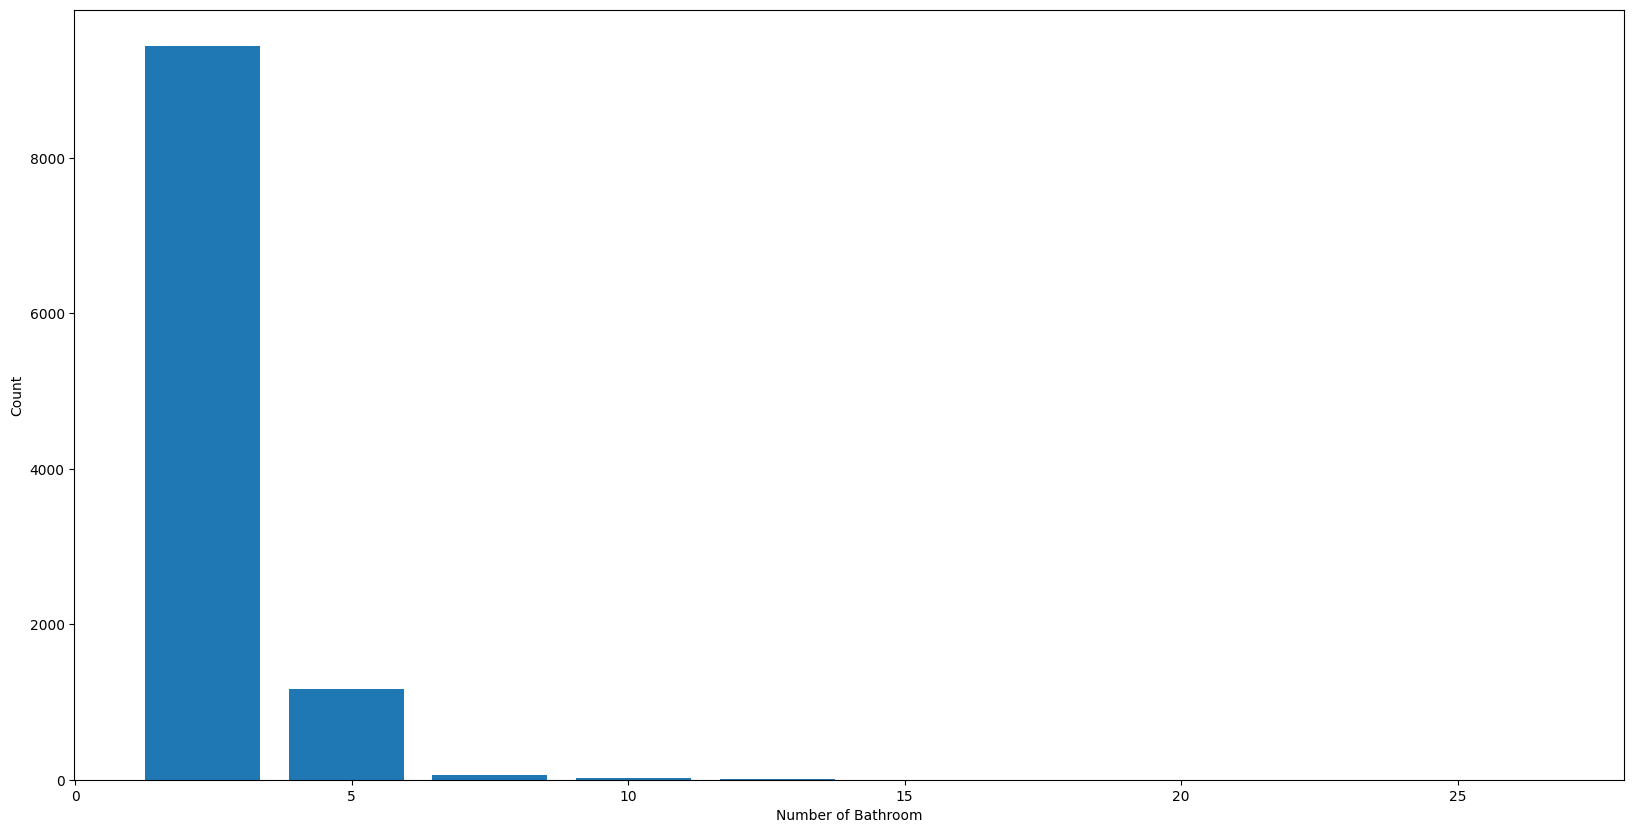

In [55]:
#plot bathroom in histogram
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df.bath,rwidth=.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")

In [56]:
#find number of bathroom which is greater than total nb of bhK+2
df[df.bath>df.bhk+2]


,area_type,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_square_feet
1593,Plot Area,Chamrajpet,6 Bedroom,NaN,1500.0,9.0,3.0,230.0,6.0,15333.333333
1730,Built-up Area,Chikkabanavar,4 Bedroom,NaN,2460.0,7.0,2.0,80.0,4.0,3252.032520
5493,Built-up Area,Nagasandra,4 Bedroom,NaN,7000.0,8.0,NaN,450.0,4.0,6428.571429
7028,Super built-up Area,Thanisandra,3 BHK,Soitya,1806.0,6.0,2.0,116.0,3.0,6423.034330
8808,Super built-up Area,other,6 BHK,Prowshi,11338.0,9.0,1.0,1000.0,6.0,8819.897689
10113,Plot Area,other,6 Bedroom,NaN,1200.0,9.0,3.0,122.0,6.0,10166.666667


In [57]:
#remove bathrom outliers
df =df[df.bath<df.bhk+2]
df.shape

(10583, 10)

In [58]:
#we can drop size feature bcz we already have bhk feature and also we can drop price per sqft column bcz we create it only for outlier detection
df=df.drop(["price_per_square_feet","size"],axis="columns")
df

,area_type,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,NaN,2850.0,4.0,1.0,428.00,4.0
1,Super built-up Area,1st Block Jayanagar,NaN,1630.0,3.0,2.0,194.00,3.0
2,Super built-up Area,1st Block Jayanagar,NaN,1200.0,6.0,2.0,125.00,6.0
3,Super built-up Area,1st Block Jayanagar,NaN,1875.0,2.0,3.0,235.00,3.0
4,Built-up Area,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.00,3.0
...,...,...,...,...,...,...,...,...
10735,Super built-up Area,other,OlarkLa,1353.0,2.0,2.0,110.00,2.0
10736,Plot Area,other,NaN,812.0,1.0,0.0,26.00,1.0
10737,Super built-up Area,other,Plowsri,1440.0,2.0,2.0,63.93,3.0
10738,Super built-up Area,other,NaN,1075.0,2.0,2.0,48.00,2.0


In [59]:
df.shape

(10583, 8)

In [60]:
df.dtypes

area_type      object
location       object
society        object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

In [61]:
pd.api.types.is_string_dtype(df['area_type'])

True

In [62]:
#check the column which contain object type
for label,content in df.items():   #df.items() works as a dictionary,key -column name,values =column value
    if pd.api.types.is_string_dtype(content):
        print(label)


area_type
location


In [63]:
#Turn object value into category value
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()


In [64]:
#check whether object type columns exist or not
for label,content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

In [65]:
df.dtypes

area_type     category
location      category
society       category
total_sqft     float64
bath           float64
balcony        float64
price          float64
bhk            float64
dtype: object

In [66]:
df.head().T

,0,1,2,3,4
area_type,Super built-up Area,Super built-up Area,Super built-up Area,Super built-up Area,Built-up Area
location,1st Block Jayanagar,1st Block Jayanagar,1st Block Jayanagar,1st Block Jayanagar,1st Block Jayanagar
society,NaN,NaN,NaN,NaN,Bhsic C
total_sqft,2850.0,1630.0,1200.0,1875.0,1200.0
bath,4.0,3.0,6.0,2.0,2.0
balcony,1.0,2.0,2.0,3.0,0.0
price,428.0,194.0,125.0,235.0,130.0
bhk,4.0,3.0,6.0,3.0,3.0


In [67]:
df.total_sqft.unique()

array([ 2850.,  1630.,  1200., ..., 30400.,  1369.,  2872.])

In [68]:
df.isnull().sum()

area_type        0
location         0
society       3996
total_sqft       0
bath             0
balcony        327
price            0
bhk              0
dtype: int64

## Save preprocessed data


In [69]:
#export current tmp df
df.to_csv('train_temp.csv', index=False)


In [70]:
#import preprocessed data
df_temp=pd.read_csv('train_temp.csv')

In [71]:
df_temp.isnull().sum()

area_type        0
location         0
society       3996
total_sqft       0
bath             0
balcony        327
price            0
bhk              0
dtype: int64

# Fill missing value


 ## Fill numeric value first


In [72]:
df_temp.isnull().sum()/len(df)

area_type     0.000000
location      0.000000
society       0.377587
total_sqft    0.000000
bath          0.000000
balcony       0.030899
price         0.000000
bhk           0.000000
dtype: float64

In [73]:
df_temp.isnull().sum()

area_type        0
location         0
society       3996
total_sqft       0
bath             0
balcony        327
price            0
bhk              0
dtype: int64

In [74]:
#numeric label  in datasets
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


total_sqft
bath
balcony
price
bhk


In [75]:
#check the label which numeric label have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


balcony


In [76]:
#Fill numeric rows with medians
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add a binary column which tells us if the data is missing
            df_temp["missing_"+label]=pd.isnull(content)
            df_temp[label]=content.fillna(content.median())

In [77]:
#check againg whether numeric column has null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [78]:
#check to see
df_temp.missing_balcony.value_counts()  #tells up we fill 222 missing columns with median

missing_balcony
False    10256
True       327
Name: count, dtype: int64

## Fill categorical missing values

#### We have just fill numeric missing value.We still have missing value in categorical type columns

In [79]:
#check null values
df_temp.isnull().sum()

area_type             0
location              0
society            3996
total_sqft            0
bath                  0
balcony               0
price                 0
bhk                   0
missing_balcony       0
dtype: int64

In [80]:
df_temp.society.value_counts().max()

80

In [81]:
#categorical labels in datasets
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

area_type
location
society


In [82]:
#Check categorical labels have null value
for label,content in df_temp.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [83]:
#Fill missing value
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
         #add a binary column which tells us if the data is missing
        df_temp["missing_"+label]=pd.isnull(content)
        #Turn categories into numbers and add+1
        df_temp[label]=pd.Categorical(content).codes+1  #codes add -1 where find missinf value,for this we add+1


In [84]:
pd.Categorical(df_temp["society"]).codes

array([   0,    0,    0, ..., 1307,    0,    0], dtype=int16)

In [85]:
pd.Categorical(df_temp["society"]).codes+1

array([   1,    1,    1, ..., 1308,    1,    1], dtype=int16)

In [86]:
df_temp.missing_society.value_counts()  #tells up we fill 1877 missing columns with codes+1

missing_society
False    6587
True     3996
Name: count, dtype: int64

In [87]:
df_temp.dtypes

area_type               int8
location               int16
society                int16
total_sqft           float64
bath                 float64
balcony              float64
price                float64
bhk                  float64
missing_balcony         bool
missing_area_type       bool
missing_location        bool
missing_society         bool
dtype: object

In [88]:
df_temp.isnull().sum()

area_type            0
location             0
society              0
total_sqft           0
bath                 0
balcony              0
price                0
bhk                  0
missing_balcony      0
missing_area_type    0
missing_location     0
missing_society      0
dtype: int64

In [89]:
#check whether missing value exist in categorical column
for label,content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            print(label)

society


In [90]:
df_temp.isnull().sum()

area_type            0
location             0
society              0
total_sqft           0
bath                 0
balcony              0
price                0
bhk                  0
missing_balcony      0
missing_area_type    0
missing_location     0
missing_society      0
dtype: int64

In [91]:
df.head()

,area_type,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,NaN,2850.0,4.0,1.0,428.0,4.0
1,Super built-up Area,1st Block Jayanagar,NaN,1630.0,3.0,2.0,194.0,3.0
2,Super built-up Area,1st Block Jayanagar,NaN,1200.0,6.0,2.0,125.0,6.0
3,Super built-up Area,1st Block Jayanagar,NaN,1875.0,2.0,3.0,235.0,3.0
4,Built-up Area,1st Block Jayanagar,Bhsic C,1200.0,2.0,0.0,130.0,3.0


In [92]:
len(df.location.unique())

242

#### Now that all of data is numeric as well as our dataframe has no missing value,we should be able to build a machine learning model

In [93]:
df_temp.head()

,area_type,location,society,total_sqft,bath,balcony,price,bhk,missing_balcony,missing_area_type,missing_location,missing_society
0,4,1,0,2850.0,4.0,1.0,428.0,4.0,False,False,False,True
1,4,1,0,1630.0,3.0,2.0,194.0,3.0,False,False,False,True
2,4,1,0,1200.0,6.0,2.0,125.0,6.0,False,False,False,True
3,4,1,0,1875.0,2.0,3.0,235.0,3.0,False,False,False,True
4,1,1,266,1200.0,2.0,0.0,130.0,3.0,False,False,False,False


In [94]:
df_temp.shape

(10583, 12)

In [95]:
len(df_temp)

10583

In [96]:
X=df_temp.drop("price",axis=1)
X
df_temp.shape

(10583, 12)

In [97]:
y=df_temp["price"]
y

0        428.00
1        194.00
2        125.00
3        235.00
4        130.00
          ...  
10578    110.00
10579     26.00
10580     63.93
10581     48.00
10582    400.00
Name: price, Length: 10583, dtype: float64

In [98]:
# Create evaluation function

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    """
    calculates root mean sqared log error betweeen prediction and true lebels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#create function to evaluates model on few differnect levels

def show_score(model):
    train_preds=model.predict(X_train)
    test_preds=model.predict(X_test)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Test MAE":mean_absolute_error(y_test,test_preds)   ,
            "Training RMSLE":rmsle(y_train,train_preds),
            "Test RMSLE":rmsle(y_test,test_preds),
            "Training R^2":r2_score(y_train,train_preds),
            "Test R^2":r2_score(y_test,test_preds)
                                               }
    return scores

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)

lr=LinearRegression()
lr.fit(X_train,y_train)
yl_pred=lr.predict(X_test)
yl_pred

array([112.98461018, 109.24954031, 127.07162539, ...,  71.48893947,
        60.81570695,  68.71525878])

In [100]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae= mean_absolute_error(y_test,yl_pred)
Score=r2_score(y_test,yl_pred)
print(Score)
print(mae)

0.3545562909364236
33.56813522164562


In [101]:
%%time
#calculate how much time this particular cells takes to run

#instantiate model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=123)
#n_jobs is to make your algorithm make run in parallel. Here when dealing with tree based algorithms, the execution will take place in parallel. with n_jobs=1 it uses 100% of the cpu of one of the cores.
model.fit(X_train,y_train)

CPU times: total: 9.86 s
Wall time: 3.96 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [102]:
#cutting down on the max number of samples each estimator can see improves training time
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=1000)


In [103]:
%%time
model.fit(X_train,y_train)
#time reduce from previouss after set max_sample
# X_train.shape[0]

CPU times: total: 2.19 s
Wall time: 734 ms


RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [104]:
show_score(model)  #testing error is slightly higher than training error

{'Training MAE': 18.972735932919353,
 'Test MAE': 21.291566053602356,
 'Training RMSLE': 0.24786726265973924,
 'Test RMSLE': 0.28250594831471315,
 'Training R^2': 0.7336886406653826,
 'Test R^2': 0.7044315177331714}

### Hyperparameter tuning with RandomizedSearchCV

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the parameter grid with valid 'max_features' options
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "log2", None],  # Updated max_features options
    "max_samples": [3000]
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=100,  # Number of combinations to try
    cv=5,  # Cross-validation
    verbose=True
)

# Fit the model
rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', 'log2',
                                                         None],
                                        'max_samples': [3000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [106]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 3000,
 'max_features': 'sqrt',
 'max_depth': None}

## Train model with best hyperparameter

In [107]:
#most ideal hyperparamter
ideal_model=RandomForestRegressor(n_estimators= 20,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_samples= 3000,
 max_features= 0.5,
 max_depth= None)

#fit the model
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, max_samples=3000, n_estimators=20)

In [108]:
#score for ideal model
show_score(ideal_model)

{'Training MAE': 14.521919926625268,
 'Test MAE': 19.564361854432377,
 'Training RMSLE': 0.19660251546138557,
 'Test RMSLE': 0.27018831874284327,
 'Training R^2': 0.8184701519631024,
 'Test R^2': 0.7432196585778098}

In [109]:
show_score(model)

{'Training MAE': 18.972735932919353,
 'Test MAE': 21.29156605360236,
 'Training RMSLE': 0.24786726265973924,
 'Test RMSLE': 0.28250594831471315,
 'Training R^2': 0.7336886406653826,
 'Test R^2': 0.7044315177331714}